In [45]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [46]:
dataset_root = r"E:\MasterDaten\Datasets\cvpr15_MSRAHandGestureDB"

In [47]:
path = r"E:\MasterDaten\Datasets\cvpr15_MSRAHandGestureDB\P0\TIP\000001_depth.bin"
"""
While the depth image is 320x240, the valid hand region is usually much smaller. To save space, each *.bin file only stores the bounding 
box of the hand region. Specifically, each bin file starts with 6 unsigned int: img_width img_height left top right bottom. [left, right) and [top, bottom) 
is the bounding box coordinate in this depth image. The bin file then stores all the depth pixel values in the bounding box in row scanning order, 
which are  (right - left) * (bottom - top) floats. The unit is millimeters. The bin file is binary and needs to be opened with std::ios::binary flag.
"""

with open(path, 'rb') as f:
    binary = f.read()
img_width, img_height, left, top, right, bottom = struct.unpack("IIIIII", binary[:6*4])
print(img_width, img_height, left, top, right, bottom)

320 240 94 49 206 192


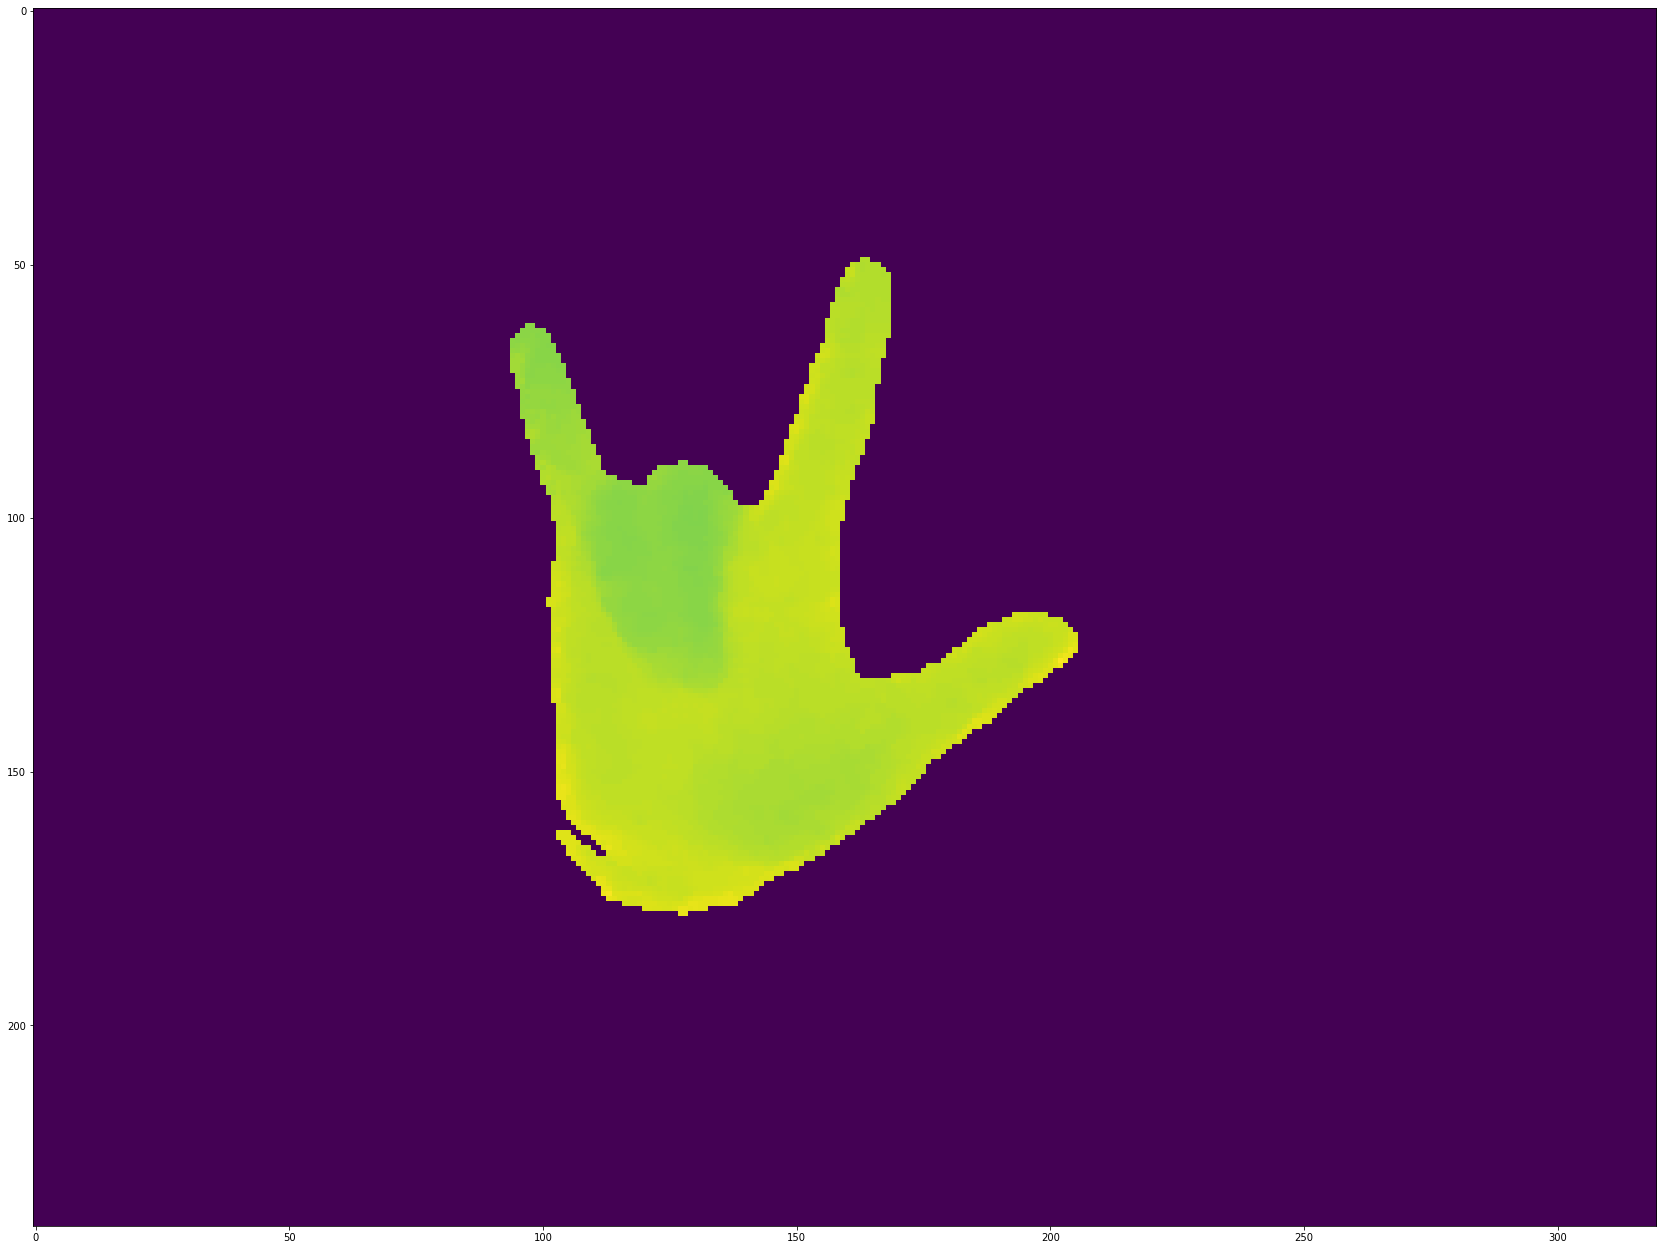

In [48]:
cropped_image = np.frombuffer(binary[6*4:], dtype=np.float32)
cropped_image = cropped_image.reshape(((bottom - top), (right - left)))    
new_image = np.pad(cropped_image, [[top, img_height-bottom], [left, img_width-right]], constant_values=0)

fig = plt.figure(figsize=(64, 64))
ax = fig.add_subplot(221)
ax.imshow(new_image)

In [49]:
success, encoded = cv2.imencode(".png", new_image.astype(np.uint16))

In [50]:
#num_frames = open(r"E:\MasterDaten\Datasets\cvpr15_MSRAHandGestureDB\P1\1\joint.txt", 'r').readline().strip()
#skels = np.loadtxt(r"E:\MasterDaten\Datasets\cvpr15_MSRAHandGestureDB\P1\1\joint.txt", skiprows=1)

In [51]:
with open(r"E:\MasterDaten\Datasets\cvpr15_MSRAHandGestureDB\P1\1\joint.txt", 'r') as joint_f:
    num_frames = int(joint_f.readline().strip())
    skels = np.loadtxt(joint_f)